# MLPClassifier( ) -> Multi-Layer Perceptron

Redes Neurais Artificiais são modelos computacionais inspirados no Sistema Nervoso Central de um animal (em particular, o cérebro) e são capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões. Redes neurais artificiais geralmente são apresentadas como sistemas de "neurônios interconectados, que podem computar valores de entradas", simulando o comportamento das redes neurais biológicas. (Wikipedia) 

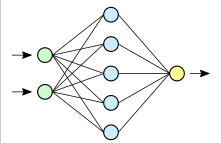

Prós:
* Baixa necessidade de manipulação das variáveis, pois o modelo se otimiza sozinho.
* Alta performance

Contras: 
* Gasto computacional elevado para ajuste (pouco gasto para realizar previsões)
* Interpretabilidade

##### Neurons

Neurônios (nodes ou neurons) são como "funções" que recebem um vetor de inputs (x1, x2, ..., xn) e retornam um vetor de outputs (y1, y2, ...,yn), baseando-se em uma regra de cálculo específica. 

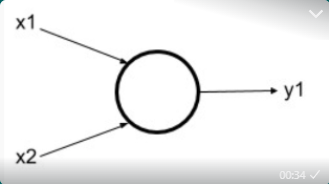

No modelo `MLP`, cada neurônio realiza uma simples operação, que é definida como calcular uma função linear das variáveis (combinador linear) dado um viés (b) e pesos (w) para cada uma. Logo depois, aplicamos uma *função de ativação* em cima do resultado obtido de forma que o resultado obtido seja um número entre 0 e 1.

**Obs.:** Também são funções de ativação conhecidas: ReLU, tangente hiperbólica (tanh), sendo comumente utilizada a função sigmóide (a mesma utilizada na regressão logística).

$$ y = f(w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} + b) = \frac{1}{1 + e^{(w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} + b)}}$$

### Funcionamento em um sistema MLP

Redes neurais combinam diversas camadas de neurônios, de forma que o output de um neurônio seja o input do outro e assim por diante. MLP é uma rede *feed-forward*, i.e, todos os neurônios enviam sinais para frente, em um único sentido. 

O MLP sempre possui uma camada de input (com um neuron para cada input) e outra de outputs (com um neuron para sinalizar um alvo binário para cada output desejado), sendo as restantes somente camadas escondidas que podem conter qualquer quantidade de neurônios.  

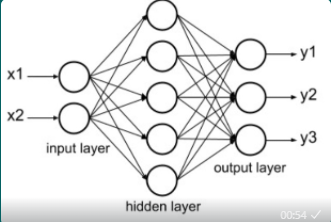

### Função de Custo

Para treinar uma rede neural, é criada uma função de custo que demonstra o quanto o valor previsto está distante do valor real desejado.

Para isso é calculada a *entropia cruzada*, que é uma função idêntica à função de verossimilhança utilizada para estimar os parâmetros de uma regresão logística. Ela estabelece uma recompensa com base em cada valor previsto pelo modelo (valor da verossimilhança) e retorna um score final para cada tipo de modelo estimado, que é obtido a partir do produto entre os valores das verossimilhanças por cada acerto/erro. O melhor modelo é o que maximiza a função de verossimilhança.

Na imagem abaixo: sendo `p` a probabilidade prevista de que Y = 1, a função retornará um valor `p` caso Y realmente seja 1 e `1-p` caso Y seja 0, penalizando a distância entre o valor previsto e o valor real.

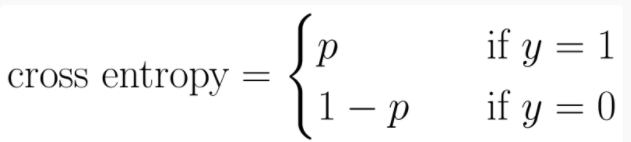


### Retropropagação

Para obter o melhor modelo possível, devemos alterar os valores dos pesos (w) e vieses (b) de cada neurônio de forma a obter o output desejado na maioria dos casos. Para isso, a rede neural MLP inicia esses coeficientes a partir de valores randômicos e tenta minimizar a função de custo de forma iterativa, até chegar em um ponto ótimo. O número de neurônios e camadas escondidas deve ser fornecido previamente. 

Um método comum é o Stochastic Gradient Descent, que se resume ao cálculo do gradiente da função de custo (vetor com as derivadas parciais da função de custo em relaçao a cada peso e cada viés). Sabemos que a direção apontada pelo gradiente de uma função indica a direção que maximiza seu valor naquele ponto, logo a partir do valor que está em direção oposta a ela podemos obter o valor que minimiza seu valor naquele ponto. Partindo desse princípio, podemos encontrar iterativamente o ponto cujos valores para os coeficientes minimizariam a função de custo.

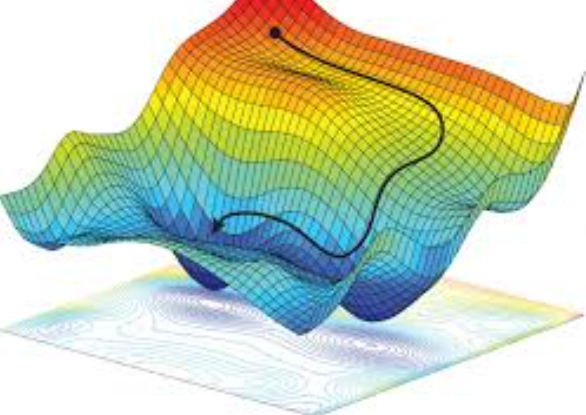

# Construindo o Algoritmo

### Importação das Bibliotecas e Manipulação dos Dados

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../dados/titanic.csv")
df.drop(["PassengerId", "Name", "SibSp", "Ticket", "Cabin", "Embarked", "Parch"], axis = 1, inplace = True)
df["Sex"] = np.where(df["Sex"] == "male", 1, 0)
df.dropna(inplace = True)
df.head() # Alvo Binário: Survived

X = df.drop("Survived", axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Ajuste do Modelo

Muitas vezes iremos obter uma mensagem de que o número máximo de iterações foi obtido e o modelo ainda não convergiu para um ponto ótimo. Para isso, podemos definir o número máximo de iterações a ser realizado, dentro da classe do modelo.

> ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

In [5]:
modelo = MLPClassifier(random_state = 42, max_iter=1000) # gera um modelo aleatório a cada vez que rodamos o código
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)

In [18]:
# Probabilidades (lista contendo [P(X), P(Y)])
y_pred_proba = modelo.predict_proba(X_test)[:,1]
y_pred_proba[:10]

In [13]:
# Obtendo os coeficientes do modelo (possui duas camadas, uma escondida e uma de outputs)
len(modelo.coefs_)

2

### Métricas de Avaliação

In [6]:
# Acurácia
print(accuracy_score(y_test, y_pred))

0.816793893129771


In [7]:
# Matriz de Confusão
print(confusion_matrix(y_test, y_pred))

[[134  28]
 [ 20  80]]


In [8]:
# Métricas de Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       162
           1       0.74      0.80      0.77       100

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



In [19]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

AUC - Teste : 0.8741049382716051


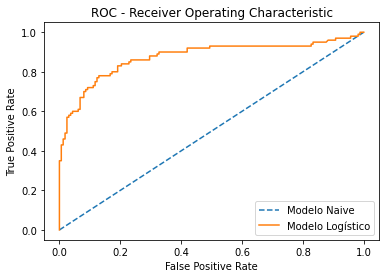

In [20]:
# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Modelo Logístico')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Otimização

Parâmetros a serem otimizados:
* hidden_layer_sizes -> tupla contendo o número de neurônios dentro de cada camada (padrão: uma camada de 100 neurons)
* max_iter -> número máximo de iterações a serem realizadas pelo método de *backpropagation*
* alpha -> o valor máximo de alteração dos coeficientes em cada iteração, para minimizar a função de custo (padrão: 0.0001)
* solver -> Algoritmo utilizado para encontrar a solução ótima, cujo tempo de obtenção da resposta varia. Opções: 'lbfgs', 'sgd' e 'adam'.